**Table of contents**<a id='toc0_'></a>    
- [Missing Values](#toc1_)    
- [Decision metrics](#toc2_)    
- [Source Page Metrics](#toc3_)    
- [Disclosed indicators](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
llama2 = pd.read_excel('./data/Zara_Financial_Sustainability_Report_2023_llama2_topk8_paramsall.xlsx')
llama2.drop(["Unnamed: 0"], axis=1, inplace=True)

llama3 = pd.read_excel('./data/Zara_Financial_Sustainability_Report_2023_llama3_instruct_topk8_paramsall.xlsx')
llama3.drop(["Unnamed: 0"], axis=1, inplace=True)

mistral = pd.read_excel('./data/Zara_Financial_Sustainability_Report_2023_mistral_topk8_paramsall.xlsx')
mistral.drop(["Unnamed: 0"], axis=1, inplace=True)

phi3 = pd.read_excel('./data/Zara_Financial_Sustainability_Report_2023_phi3_topk8_params_all.xlsx')
phi3.drop(["Unnamed: 0"], axis=1, inplace=True)

# <a id='toc1_'></a>[Missing Values](#toc0_)

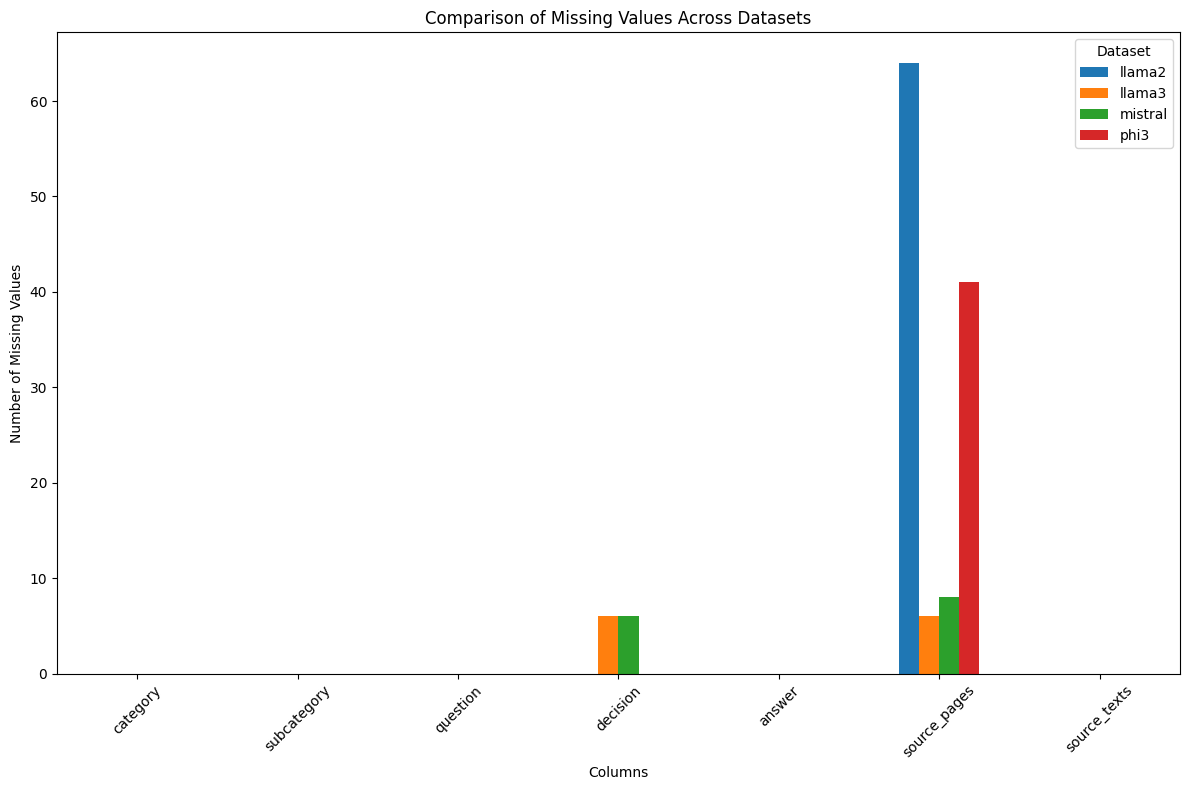

In [133]:
llama2_missing = llama2.isna().sum()
llama3_missing = llama3.isna().sum()
mistral_missing = mistral.isna().sum()
phi3_missing = phi3.isna().sum()

missing_comparison = pd.DataFrame({
    'llama2': llama2_missing,
    'llama3': llama3_missing,
    'mistral': mistral_missing,
    'phi3': phi3_missing
}).reset_index()

missing_comparison.columns = ['Column', 'llama2', 'llama3', 'mistral', 'phi3']

missing_comparison.plot(x='Column', kind='bar', figsize=(12, 8))
plt.title('Comparison of Missing Values Across Datasets')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

llama2 fails to give a single source page

# <a id='toc2_'></a>[Decision metrics](#toc0_)

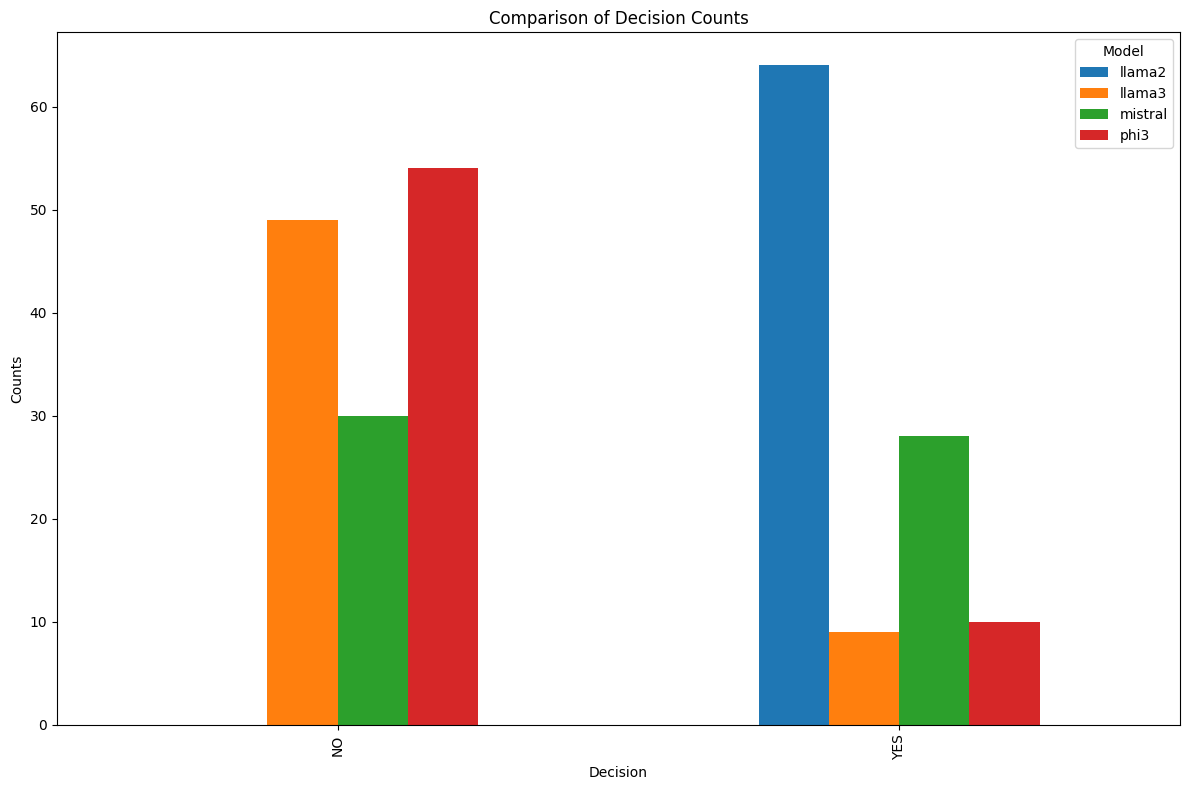

In [134]:
llama2_decision_counts = llama2['decision'].value_counts()
llama3_decision_counts = llama3['decision'].value_counts()
mistral_decision_counts = mistral['decision'].value_counts()
phi3_decision_counts = phi3['decision'].value_counts()

decision_comparison_df = pd.DataFrame({
    'llama2': llama2_decision_counts,
    'llama3': llama3_decision_counts,
    'mistral': mistral_decision_counts,
    'phi3': phi3_decision_counts
})

decision_comparison_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Decision Counts')
plt.xlabel('Decision')
plt.ylabel('Counts')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

In [135]:
mistral_missing_indices = mistral[mistral['decision'].isna()].index.tolist()
print("Indices of missing decisions in mistral:", mistral_missing_indices)
mistral_missing_entries = mistral.loc[mistral_missing_indices]
mistral_missing_entries.head(6)

Indices of missing decisions in mistral: [5, 10, 11, 34, 36, 50]


,category,subcategory,question,decision,answer,source_pages,source_texts
5,target,coverage,Does the company report its absolute emission ...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 7: (2) Scope 1, 2 ..."
10,target,offsetting,If carbon credits and offsets are reported to ...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 25: Transition dim...
11,target,offsetting,If carbon credits and offsets are reported to ...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 25: Transition dim...
34,strategy,engagement,Does the company report a strategy and activit...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 35: 6.1.5.4. Metri...
36,strategy,fossil fuels,Does the company state explicitly that it stop...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 12: These certific...
50,tracking,progress,Does the company report its absolute scope 1 G...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 7: (2) Scope 1, 2 ..."


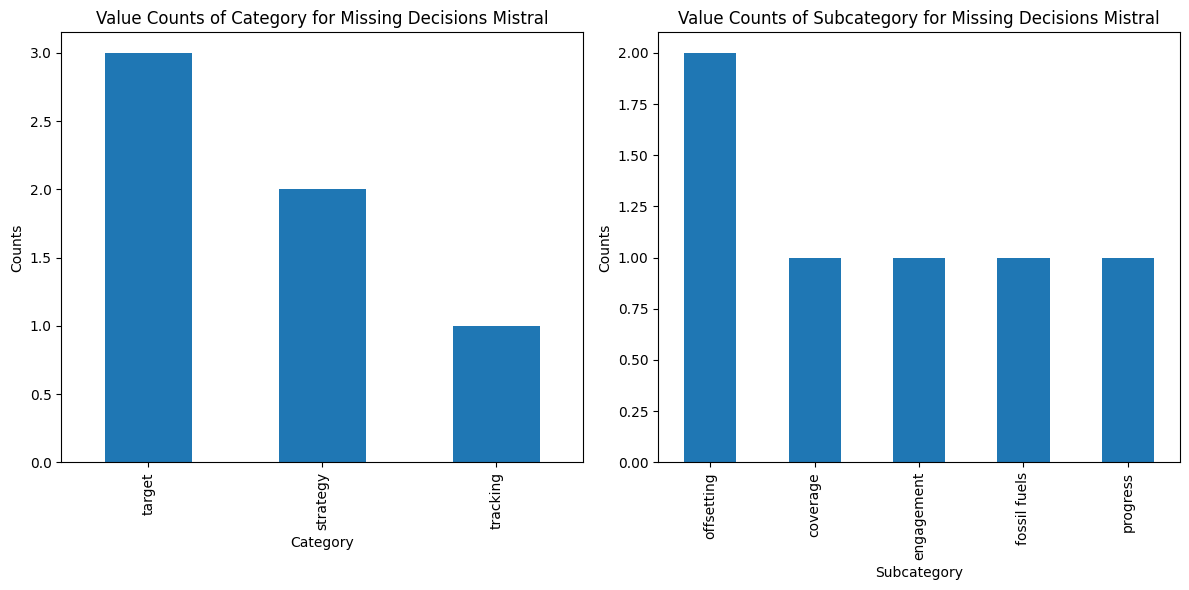

In [136]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
mistral_missing_entries['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Decisions Mistral')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
mistral_missing_entries['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Decisions Mistral')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [137]:
llama3_missing_indices = llama3[llama3['decision'].isna()].index.tolist()
print("Indices of missing decisions in llama3:", llama3_missing_indices)
llama3_missing_entries = llama3.loc[llama3_missing_indices]
llama3_missing_entries.head(6)

Indices of missing decisions in llama3: [9, 19, 36, 38, 49, 62]


,category,subcategory,question,decision,answer,source_pages,source_texts
9,target,pathway,Does the company state explicitly that the int...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 6: Interim milesto...
19,governance,transparency,Does the company report that the climate trans...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 5: And, on the oth..."
36,strategy,fossil fuels,Does the company state explicitly that it stop...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 12: These certific...
38,strategy,fossil fuels,Does the company report a strategy and activit...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 12: These certific...
49,tracking,progress,Does the company report its annual progress of...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 35: 6.1.5.4. Metri...
62,tracking,engagement,Does the company assess and report the alignme...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 5: And, on the oth..."


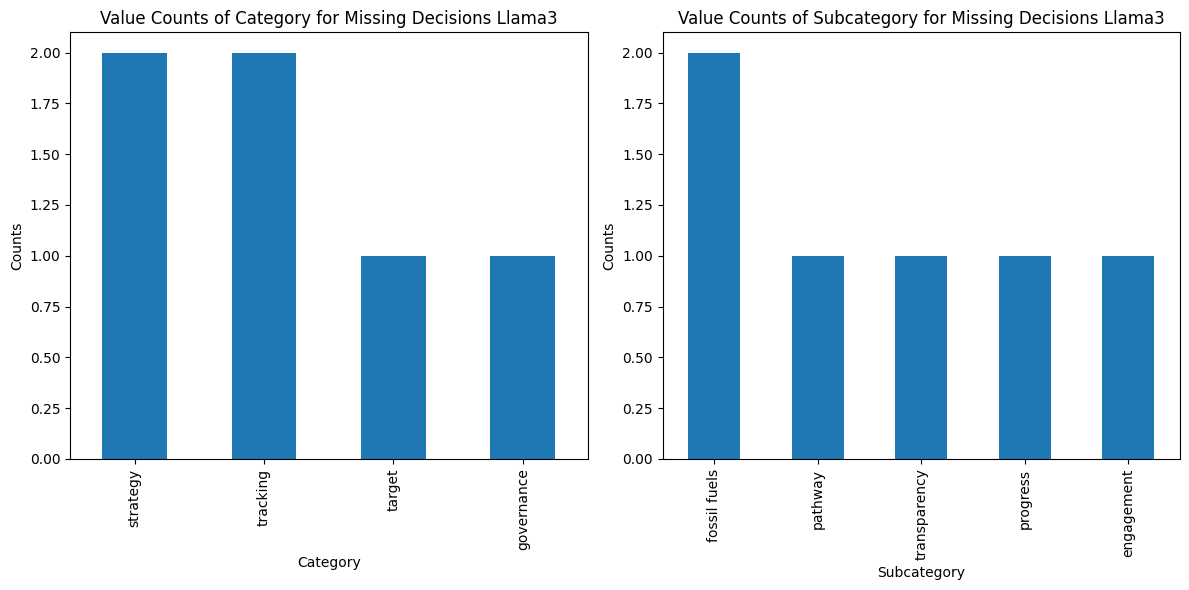

In [138]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
llama3_missing_entries['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Decisions Llama3')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
llama3_missing_entries['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Decisions Llama3')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

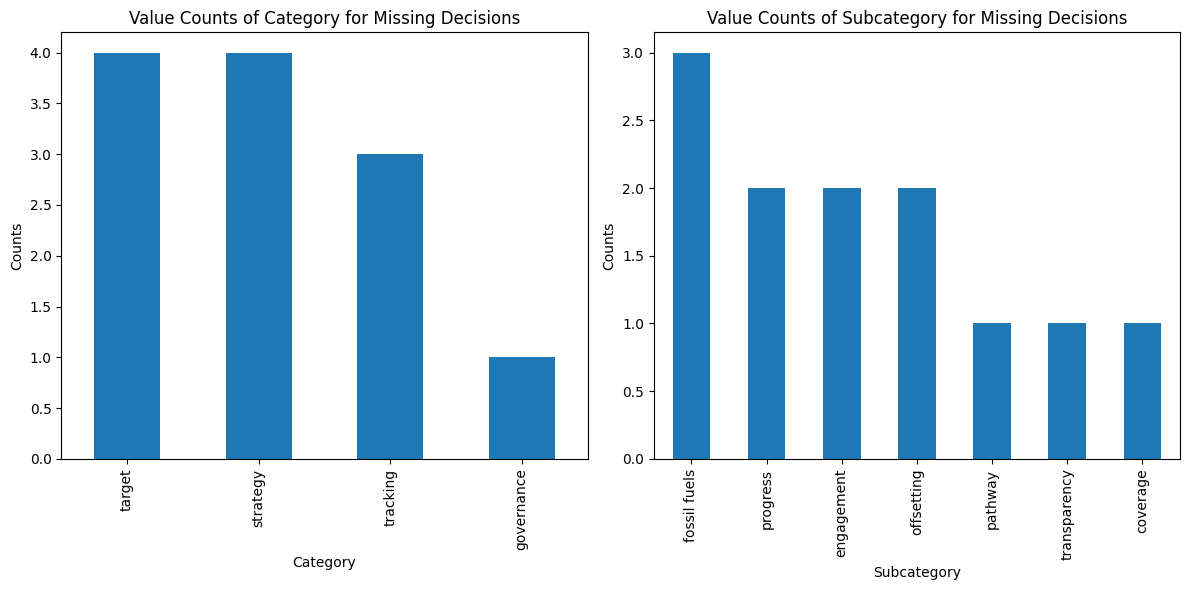

In [ ]:
concatenated_missing_decision = pd.concat([llama3_missing_entries, mistral_missing_entries], ignore_index=True)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
concatenated_missing_decision['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Decisions')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
concatenated_missing_decision['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Decisions')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

# <a id='toc3_'></a>[Source Page Metrics](#toc0_)

In [140]:
llama3_missing_source = llama3[llama3["source_pages"].isna()].index
mistral_missing_source = mistral[mistral["source_pages"].isna()].index
phi3_missing_source = phi3[phi3["source_pages"].isna()].index

In [141]:
print(f"# missing source page entries for llama3: {len(llama3_missing_source)}")
print(f"# missing source page entries for mistral: {len(mistral_missing_source)}")
print(f"# missing source page entries for phi3: {len(phi3_missing_source)}")

# missing source page entries for llama3: 6
# missing source page entries for mistral: 8
# missing source page entries for phi3: 41


In [142]:
llama3.iloc[llama3_missing_source].sample(6)

,category,subcategory,question,decision,answer,source_pages,source_texts
9,target,pathway,Does the company state explicitly that the int...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 6: Interim milesto...
19,governance,transparency,Does the company report that the climate trans...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 5: And, on the oth..."
36,strategy,fossil fuels,Does the company state explicitly that it stop...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 12: These certific...
38,strategy,fossil fuels,Does the company report a strategy and activit...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 12: These certific...
49,tracking,progress,Does the company report its annual progress of...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 35: 6.1.5.4. Metri...
62,tracking,engagement,Does the company assess and report the alignme...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 5: And, on the oth..."


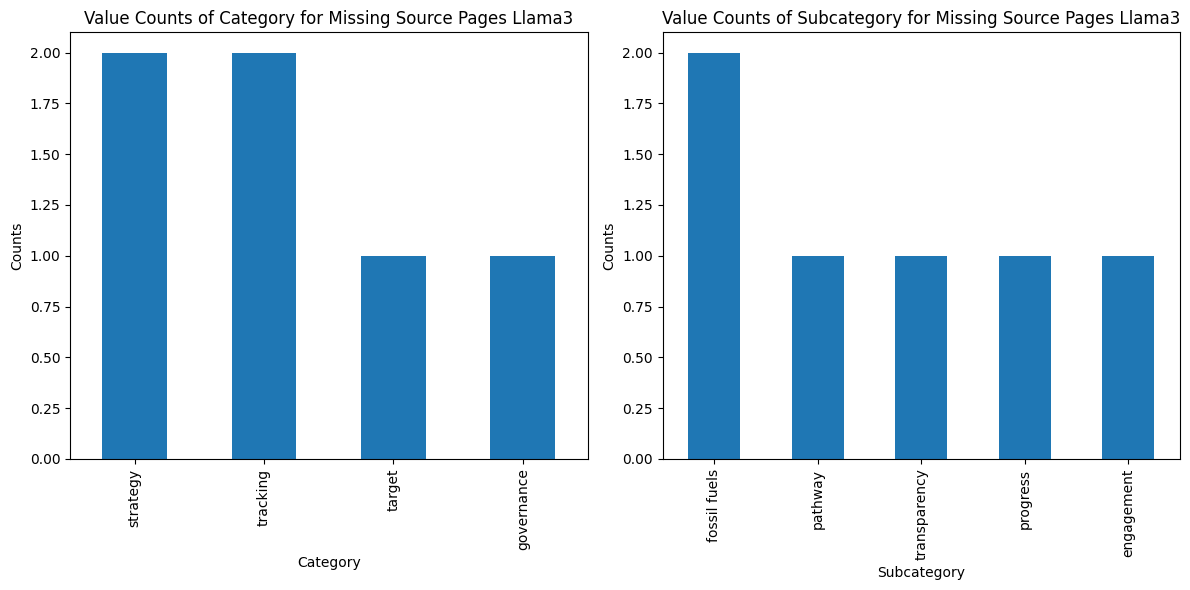

In [143]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
llama3.iloc[llama3_missing_source]['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Source Pages Llama3')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
llama3.iloc[llama3_missing_source]['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Source Pages Llama3')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [144]:
mistral.iloc[mistral_missing_source].sample(6)

,category,subcategory,question,decision,answer,source_pages,source_texts
5,target,coverage,Does the company report its absolute emission ...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 7: (2) Scope 1, 2 ..."
36,strategy,fossil fuels,Does the company state explicitly that it stop...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 12: These certific...
37,strategy,fossil fuels,Does the company report a strategy and activit...,NO,The report does not provide evidence of a comm...,NaN,[BEGIN OF SOURCES]\n\nPAGE 12: These certific...
11,target,offsetting,If carbon credits and offsets are reported to ...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 25: Transition dim...
63,tracking,engagement,Does the company report its engagement activit...,NO,The report does not provide any information re...,NaN,[BEGIN OF SOURCES]\n\nPAGE 28: /The Group's p...
10,target,offsetting,If carbon credits and offsets are reported to ...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 25: Transition dim...


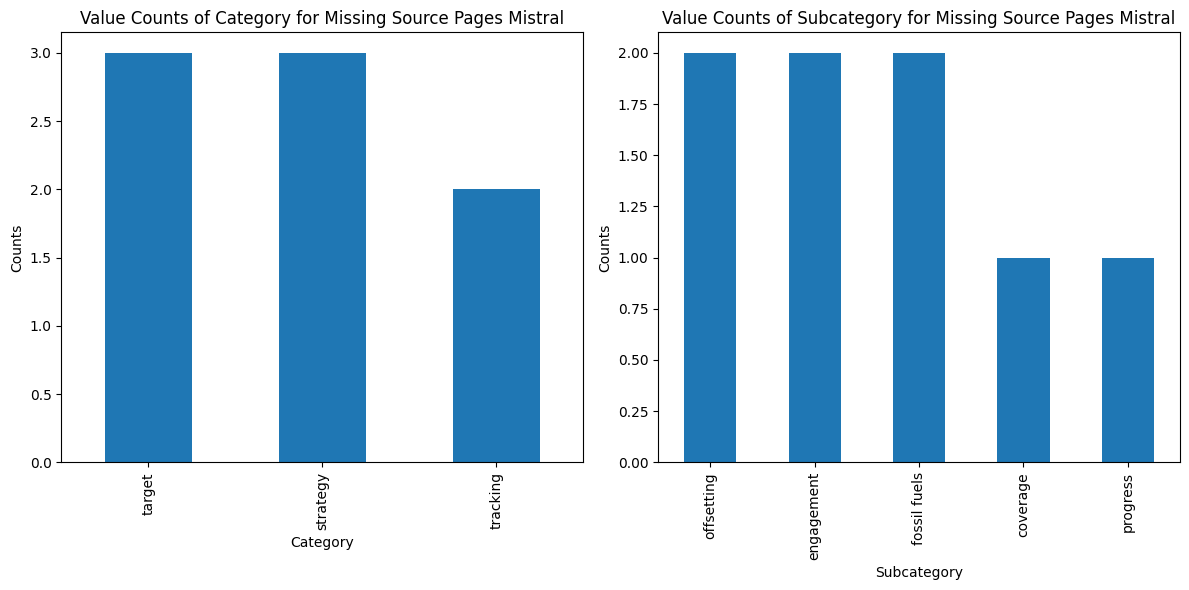

In [145]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
mistral.iloc[mistral_missing_source]['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Source Pages Mistral')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
mistral.iloc[mistral_missing_source]['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Source Pages Mistral')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [146]:
phi3.iloc[phi3_missing_source].sample(6)

,category,subcategory,question,decision,answer,source_pages,source_texts
57,tracking,progress,Does the company report annual progress agains...,NO,The company report does not explicitly mention...,NaN,[BEGIN OF SOURCES]\n\nPAGE 35: 6.1.5.4. Metri...
19,governance,transparency,Does the company report that the climate trans...,NO,The company report does mention that they have...,NaN,"[BEGIN OF SOURCES]\n\nPAGE 5: And, on the oth..."
62,tracking,engagement,Does the company assess and report the alignme...,NO,The provided sources do not contain any explic...,NaN,"[BEGIN OF SOURCES]\n\nPAGE 5: And, on the oth..."
1,target,headline,If the company communicates GHG emission inten...,NO,The report does not provide any specific GHG e...,NaN,[BEGIN OF SOURCES]\n\nPAGE 7: Emissions calcu...
59,tracking,capex,Does the company report the amount of climate ...,NO,The company's report does not explicitly menti...,NaN,[BEGIN OF SOURCES]\n\nPAGE 20: These uncertai...
35,strategy,engagement,Does the company report serious consequences a...,NO,The provided sources do not contain specific d...,NaN,[BEGIN OF SOURCES]\n\nPAGE 29: Transition dim...


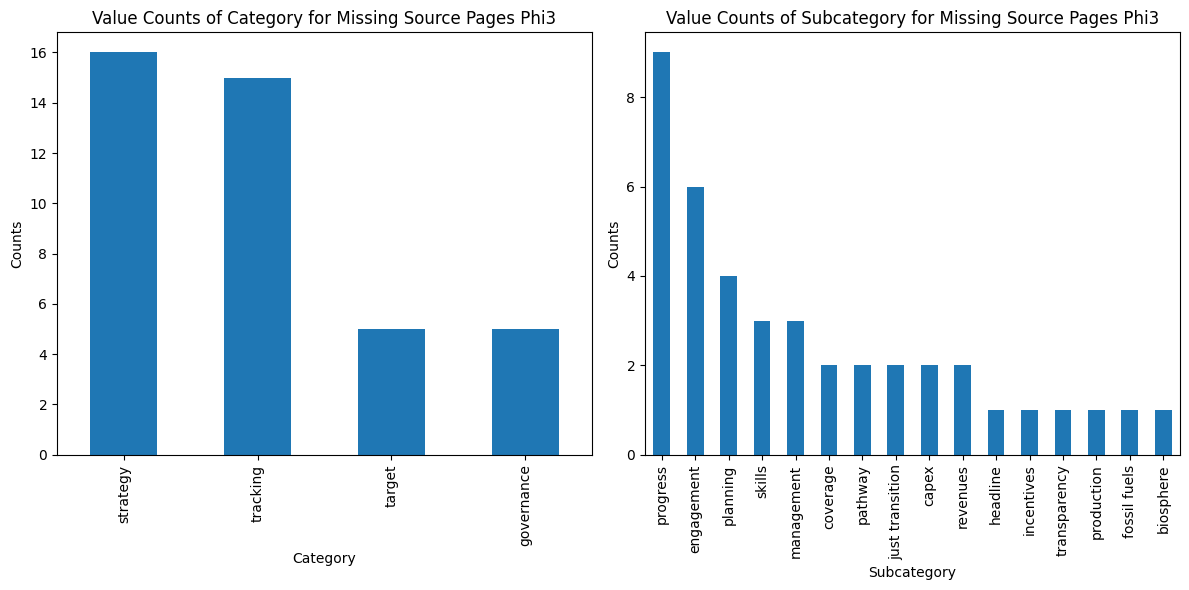

In [147]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
phi3.iloc[phi3_missing_source]['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Source Pages Phi3')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
phi3.iloc[phi3_missing_source]['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Source Pages Phi3')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [148]:
overlap_all = set(llama3_missing_source).intersection(set(mistral_missing_source), set(phi3_missing_source))
overlap_llama3_mistral = set(llama3_missing_source).intersection(set(mistral_missing_source))
overlap_llama3_phi3 = set(llama3_missing_source).intersection(set(phi3_missing_source))
overlap_mistral_phi3 = set(mistral_missing_source).intersection(set(phi3_missing_source))

print("Values overlapping in all three lists:", overlap_all)
print("Values overlapping between llama3 and mistral:", overlap_llama3_mistral)
print("Values overlapping between llama3 and phi3:", overlap_llama3_phi3)
print("Values overlapping between mistral and phi3:", overlap_mistral_phi3)

Values overlapping in all three lists: set()
Values overlapping between llama3 and mistral: {36}
Values overlapping between llama3 and phi3: {9, 19, 62, 49}
Values overlapping between mistral and phi3: {34, 50, 37, 63}


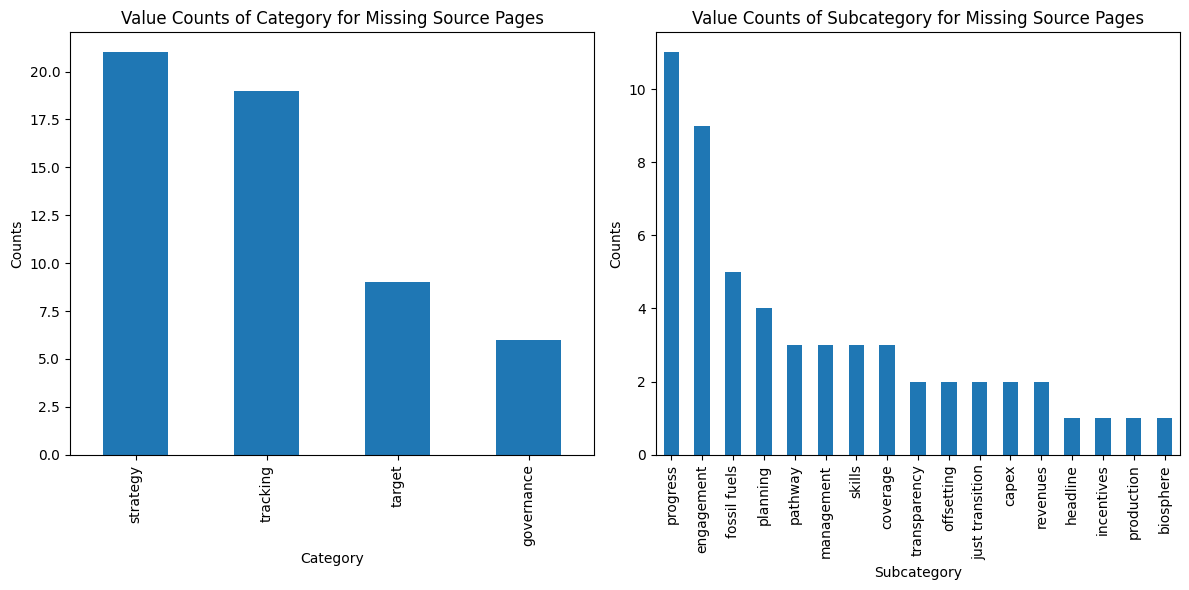

In [ ]:
concatenated_missing_source_page = pd.concat([llama3.iloc[llama3_missing_source], mistral.iloc[mistral_missing_source], phi3.iloc[phi3_missing_source]], ignore_index=True)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
concatenated_missing_source_page['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Source Pages')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
concatenated_missing_source_page['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Source Pages')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

# <a id='toc4_'></a>[Disclosed indicators](#toc0_)

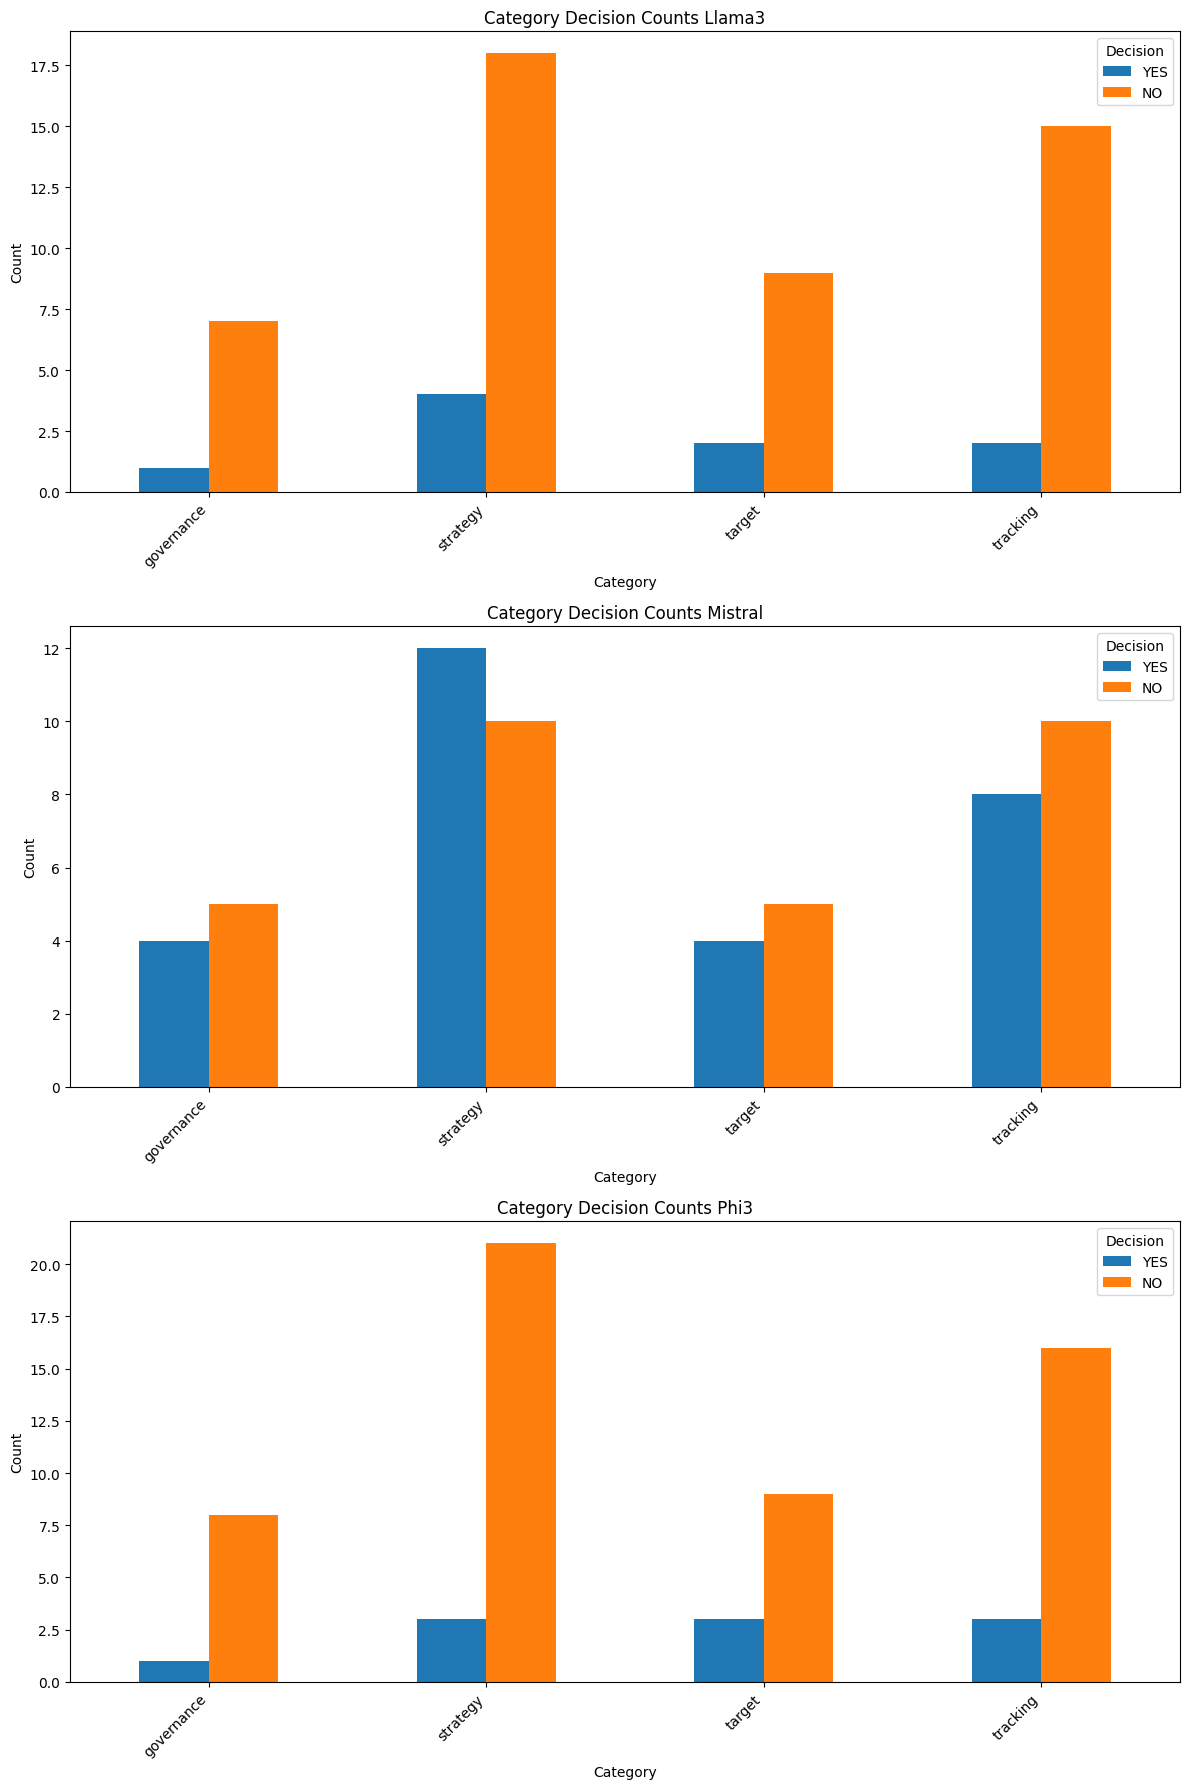

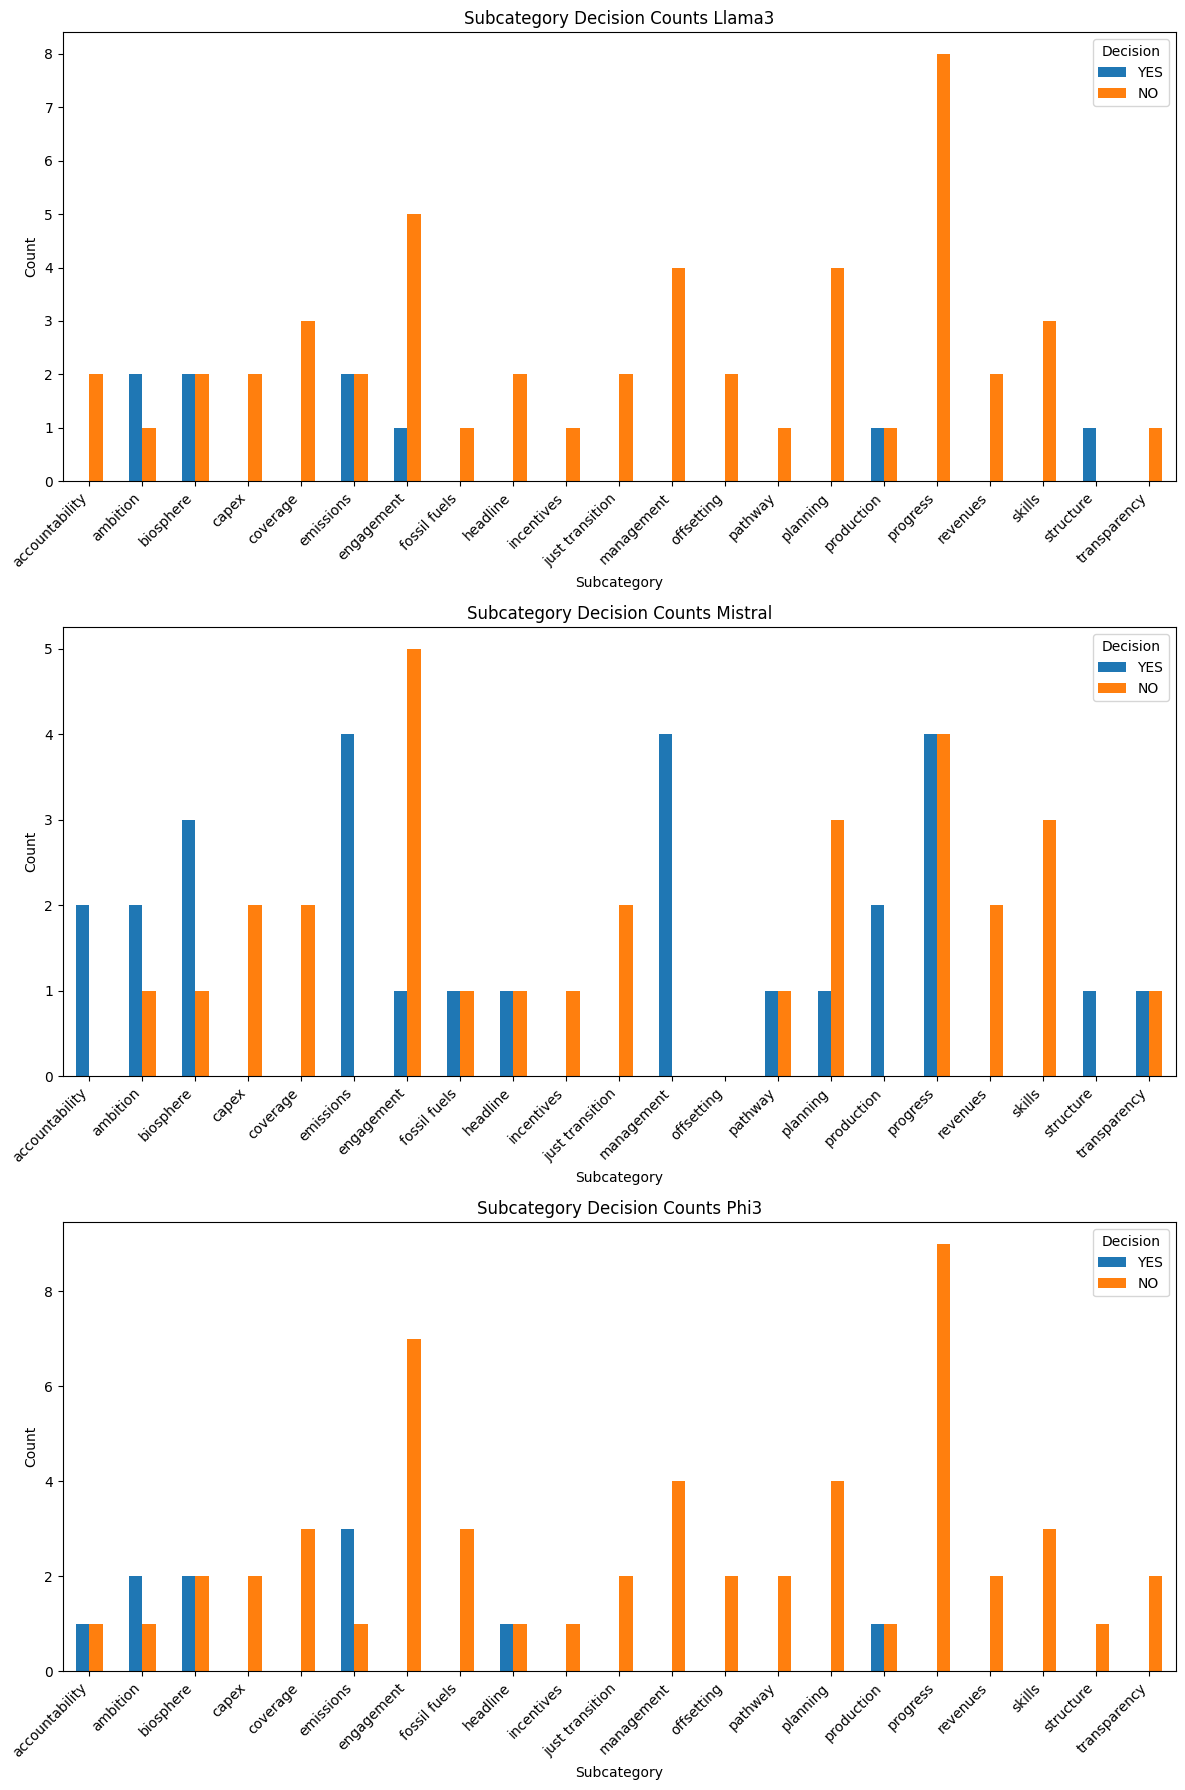

In [150]:
def plot_counts(data, title, ax, column_name, order):
    yes_counts = data[[column_name, "decision"]][data["decision"] == "YES"][column_name].value_counts()
    no_counts = data[[column_name, "decision"]][data["decision"] == "NO"][column_name].value_counts()

    counts_df = pd.DataFrame({
        "YES": yes_counts,
        "NO": no_counts
    })

    counts_df = counts_df.reindex(order)

    counts_df.plot(kind="bar", ax=ax)
    ax.set_title(title)
    ax.set_xlabel(column_name.capitalize())
    ax.set_ylabel("Count")
    ax.set_xticks(range(len(order)))
    ax.set_xticklabels(order, rotation=45, ha="right")
    ax.legend(title="Decision")

all_categories = sorted(llama3["category"].unique())
all_subcategories = sorted(llama3["subcategory"].unique())

fig, axes = plt.subplots(3, 1, figsize=(12, 18))
plot_counts(llama3, "Category Decision Counts Llama3", axes[0], "category", all_categories)
plot_counts(mistral, "Category Decision Counts Mistral", axes[1], "category", all_categories)
plot_counts(phi3, "Category Decision Counts Phi3", axes[2], "category", all_categories)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(3, 1, figsize=(12, 18))
plot_counts(llama3, "Subcategory Decision Counts Llama3", axes[0], "subcategory", all_subcategories)
plot_counts(mistral, "Subcategory Decision Counts Mistral", axes[1], "subcategory", all_subcategories)
plot_counts(phi3, "Subcategory Decision Counts Phi3", axes[2], "subcategory", all_subcategories)
plt.tight_layout()
plt.show()